# (Ford GoBike System Data Exploration )
## by (Ali Khater)

## Preliminary Wrangling

> This document explores a dataset containing information for approximately 183,000 bike trips using Ford GoBike System.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [3]:
# load in the dataset into a pandas dataframe
data = pd.read_csv('fordgobike_tripdata.csv')

In [4]:
# high-level overview of data shape and composition
print(data.shape)
print(data.dtypes)
data.head(10)

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


## Data Cleaning

- We need to remove the unnecessary columns such as 'bike_id', 'end_station_latitude',.. etc.

- We need to fill the null values in a proper way.

### 1- Remove the unnecessary columns

In [5]:
data.drop(['start_station_id', 'start_station_latitude','start_station_longitude', 'end_station_id', 'end_station_latitude',
           'end_station_longitude','bike_id'],axis =1,inplace = True)

print("Afetr Removing unnecessary columns (Rows,Columns) : ",data.shape)

Afetr Removing unnecessary columns (Rows,Columns) :  (183412, 9)


### 2- Handling null values

In [6]:
#fitst, we should find how many rows have missing values
data.isnull().any(axis = 1).sum()

8460

In [7]:
# As the rows with missing values aren't that many (nearly 4% of the data), we can simply drop them.
data.dropna(inplace = True)
# Chech for null values again.
data.isnull().any(axis = 1).sum()

0

In [8]:
# As our dataset doesn't have any duplicate rows, we should look at the final shape of it.
print(data.shape)
# let's look at the data after cleaning
data.head(10)

(174952, 9)


,duration_sec,start_time,end_time,start_station_name,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,Market St at Dolores St,Powell St BART Station (Market St at 4th St),Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,Grove St at Masonic Ave,Central Ave at Fell St,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,Frank H Ogawa Plaza,10th Ave at E 15th St,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,4th St at Mission Bay Blvd S,Broadway at Kearny,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,Palm St at Willow St,San Jose Diridon Station,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,Washington St at Kearny St,Valencia St at 21st St,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,Washington St at Kearny St,Valencia St at 21st St,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,Post St at Kearny St,Mission Playground,Subscriber,1992.0,Male,No
10,458,2019-02-28 23:57:57.2110,2019-03-01 00:05:35.4350,Jones St at Post St,San Francisco Public Library (Grove St at Hyde...,Subscriber,1996.0,Female,Yes


### What is the structure of your dataset?

> This dataset consists of approximately 175,000 records and 9 columns.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what is the age of bikers and who have longer trips, Men or Women.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> 1- duration_sec

> 2- member_birth_year

> 3- member_gender


## Univariate Exploration

> I'll start by looking at the distribution of the of the main variables of interest: age.



#### First we need to create a column for age, we will simpy subtract the values of the 'member_birth_year' column from 2019 (the year this data were collected)

In [9]:
data['age'] = 2019 - data['member_birth_year']

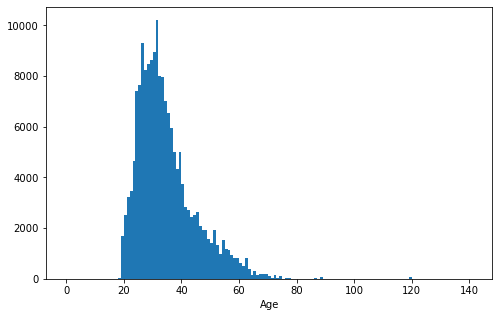

In [10]:
# start with a standard-scaled plot
bins = np.arange(0, data['age'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'age', bins = bins)
plt.xlabel('Age')
plt.show()

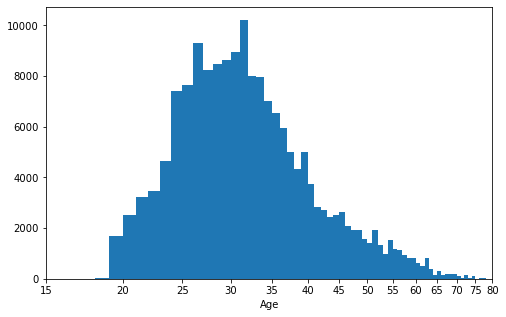

In [11]:
# to make the plot more clear, we can set limit for the x-axix and print it using the 'log scale'
bins = np.arange(0, data['age'].max()+1, 1)
plt.figure(figsize=[8, 5])
plt.hist(data = data, x = 'age', bins = bins)
plt.xscale('log')
xticks = np.arange(15, 80+5, 5)
xlabels = [str(t) for t in xticks]
plt.xticks(xticks, xlabels)
plt.xlabel('Age')
plt.xlim(15, 80)
plt.show()

> Age  has a right-tailed distribution, with a lot of bikers at thier 30's and few above 50 years. When plotted on a log-scale, the age distribution looks roughly unimodal, with one peak between 30 and 35 years.

### Next up, let's look at the gender distribution, the second main variable.

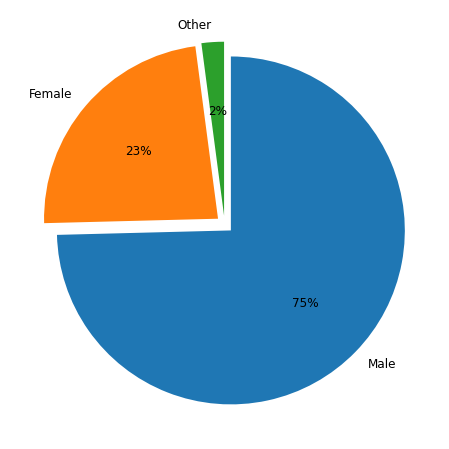

In [12]:
sorted_counts = data['member_gender'].value_counts()
plt.figure(figsize=[12, 8])
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False,
       explode=[0.05, 0.05, 0.05], autopct='%1.0f%%', textprops = {'fontsize': 12});

> Men represents most of the users in this dataset with percentage of 75%, while women represent onlt 23% of the users.

### Next up, let's look at the duration distribution.

In [14]:
# first we need to calculate the duration in minutes so it would be more interpretable
data['duration'] = data['duration_sec'] / 60 
data['duration'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration, dtype: float64

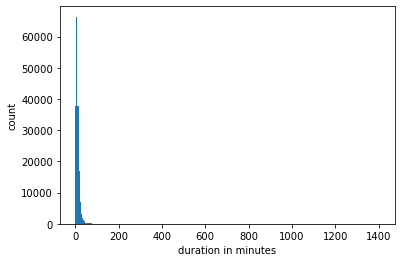

In [19]:
# now let's look at the distribution
bins = np.arange(0, data['duration'].max(), 5)
plt.hist(data = data, x = 'duration', bins = bins)
plt.xlabel('Duration in minutes')
plt.ylabel('count');

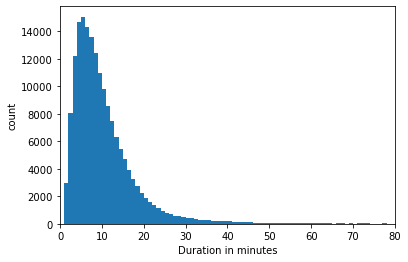

In [33]:
# Due to the outliers, we can't have good insights from this plot, so we should set some limits for the x-axix
bins = np.arange(0, data['duration'].max()+ 1, 1)
plt.hist(data = data, x = 'duration', bins = bins)
plt.xlim(0,80)
plt.xlabel('Duration in minutes')
plt.ylabel('count');

> Duration has a right-tailed distribution, with a peek at 8 minutes. Most bikers tend to use thier bikes for less than 20 minutes.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>The age variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between 30 and 35.

>The duration variable have a very wide range of values (from 1 to 1400), but more 75% of the values is less than 13 minutes, so the log transform wouldn't be a good idea here because the values form 1 to 10 wouldn't be reprsented in a proper way.


## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> First we needed to create a new column for age by simply subtraction the values of the 'member_birth_year' column from 2019 (the year this data was collected).

> we also needed to change the unit of the duration of the trips from seconds to minutes so it would be easier to understand.

> When investigating the agea and duration variables, a number of outlier points were identified. For safety, all of these points were removed from the dataset to move forwards.

## Bivariate Exploration

> To start off with, I want to look at relationship between the duration and the gender

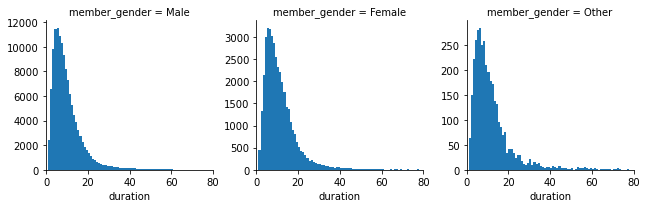

In [87]:
g = sb.FacetGrid(data = data, col = 'member_gender', col_wrap=3, 
                 col_order= data['member_gender'].value_counts().index, sharey=False)
g.map(plt.hist, 'duration', bins = bins );
plt.xlim(0, 80);

> As we should have expected, Duration distribution is the same for the different genders, they all have a right long tailed distribution with a peek at approximately 8 minutes.

### Next up, we will do the same for age instead of duration.


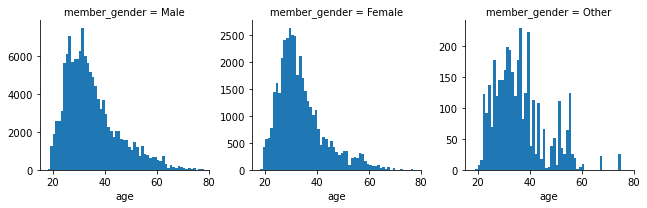

In [84]:
g = sb.FacetGrid(data = data, col = 'member_gender', col_wrap=3, 
                 col_order= data['member_gender'].value_counts().index, sharey=False)
g.map(plt.hist, 'age', bins = np.arange(0, data['age'].max()+1,1) );
plt.xlim(15, 80);

> Again, Age distribution is the same for the different genders, they all have a peek between 30 and 35 years.

### At this point,  I'd like to look at the relationship between age and duration.

Text(0, 0.5, 'Duration in minutes')

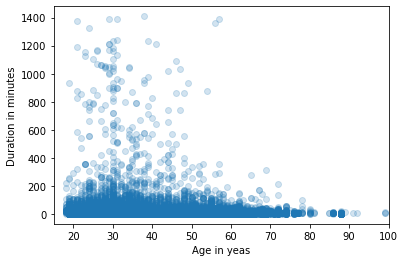

In [138]:
plt.scatter(data = data, x='age', y='duration', alpha=0.2)
plt.xlabel('Age in yeas')
plt.xlim(15,100)
plt.ylabel('Duration in minutes')

> We can clearly see that people older than 60 don't tend to have trips longer than 200 minutes at all, Unlike people between 20 years and 50 years who sometimes spend more than 500 minutes or even 1000 minutes!

### Now let's look at the relationship between duration and user type.

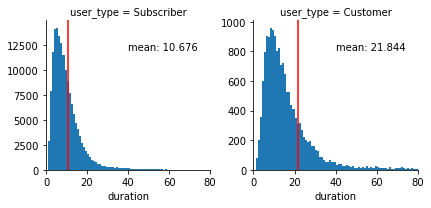

In [126]:
g = sb.FacetGrid(data = data, col = 'user_type', 
                 col_order= data['user_type'].value_counts().index, sharey=False)
g.map(plt.hist, 'duration', bins = bins )
g.map(lambda y, **kw: plt.axvline(y.mean(), color="r"), 'duration')
g.map(lambda y, **kw: plt.annotate(f"mean: {y.mean():.3f}",  xy=(0.50, 0.80), xycoords='axes fraction'), 'duration')
plt.xlim(0,80);

> The time 'Customer' users spend using thier bikes is roughly twice as much as 'Subscriber' users do.

#### Finally, let's look at the relationshipe between 'bike_share_for_all_trip' feature and 'age' feature

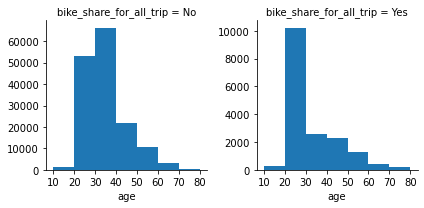

In [161]:
g = sb.FacetGrid(data = data, col = 'bike_share_for_all_trip', 
                 col_order= data['bike_share_for_all_trip'].value_counts().index, sharey=False)
g.map(plt.hist, 'age', bins = binEdges )
plt.xticks(binEdges);

> From this plot, We find that people like to shrae the same bike for all trips are between 20 years old and 30 years old.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Expected relationships were found between gender and duration, we found that for all genders the distibutin of duraion is very alike, the same goes for the relationship between age and gender.
We also looked at the relationship between the age and duration, and found that young people have long trips way more than elders do.

>There was also an interesting relationship observed between duraion and the user type feature, Customer users have duration mean about 22 minutes, while Subscriber users have duration mean of only 11 minutes.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We found that people who like to share the same bike for all the trips are between 20 yearsold and 30 years old.

## Multivariate Exploration

> The main thing I want to explore in this part of the analysis is how the two categorical measures gender and user type affect the relationship between trip duration and age.



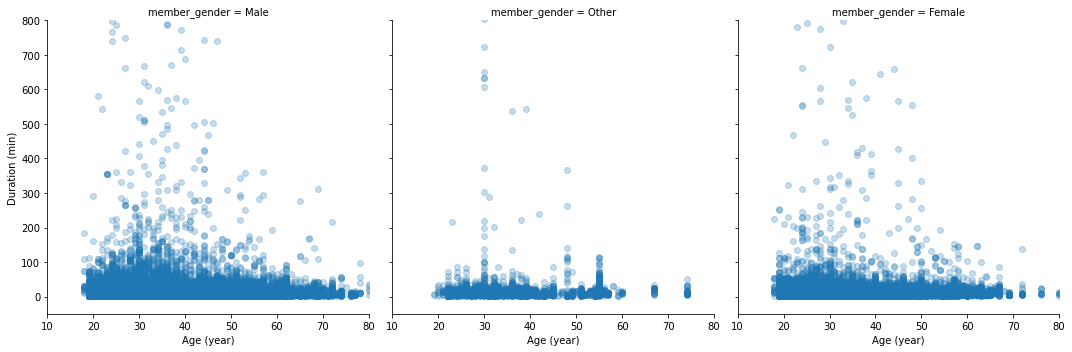

In [176]:
g = sb.FacetGrid(data = data, col = 'member_gender', col_wrap = 3, height = 5,
                 xlim = [10, 80], ylim = [-50, 800])
g.map(plt.scatter, 'age', 'duration', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (min)');

> Here we are seeing a jump in duration for 'others' at an older age (around 55 years)

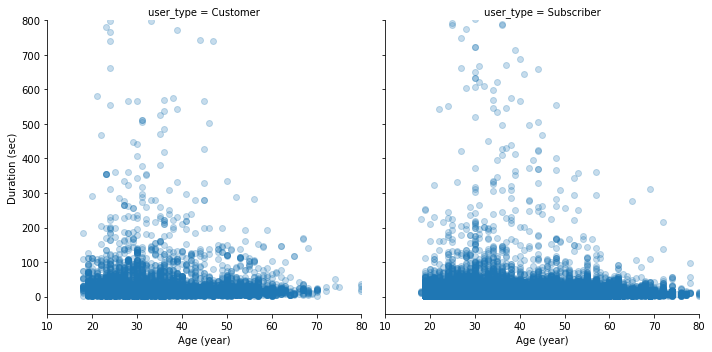

In [174]:
g = sb.FacetGrid(data = data, col = 'user_type', col_wrap = 2, height = 5,
                 xlim = [10, 80], ylim = [-50, 800])
g.map(plt.scatter, 'age', 'duration', alpha=0.25)
g.set_xlabels('Age (year)')
g.set_ylabels('Duration (sec)');

> In this case both Customer and Subscriber are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Here we observed that 'other'  has one more peak at nearly the age of 55 years for higher duration time. For different user types both are showing similer trends for age and trip duration. But there is slight tilt to higher age for subscribers having better trip duration

### Were there any interesting or surprising interactions between features?

> A second peak for other gender at an older is a surprise.